# Create cause of fire category

In [1]:
import pandas as pd
import os

In [3]:
# Define path to directory and file name
directory = r"C:\Users\agwsi\CF\6. Advanced Analytics and Dashboard design\Project folder\3. Prepared Data"
filename = "Fire_incidents_all_variables _created.csv"

# Create the full path using os.path.join
path = os.path.join(directory, filename)

# Import data and parse dates directly with dayfirst=True
tfire = pd.read_csv(
    path,
    parse_dates=[
        'date_of_ext_agent_defer', 'date_of_last_TFS_clear', 'date_of_fire_under_control',
        'date_of_TFS_alarm', 'date_of_TFS_arrival'
    ],
    dtype={'cost_dollars': 'int64'},
    index_col=False,  
    dayfirst=True  
)

In [5]:
time_columns = [col for col in tfire.columns if col.startswith('time')]

for col in time_columns:
    tfire[col] = pd.to_datetime(tfire[col], format='%H:%M:%S').dt.time

In [7]:
# enable full view of all columns
pd.set_option('display.max_columns', None)

In [15]:
tfire.columns

Index(['Column1', 'incident_station_area', 'incident_ward', 'latitude',
       'longitude', 'area_of_origin', 'extent_of_fire',
       'first_material_ignited', 'ignition_source', 'possible_cause',
       'alarm_presence', 'alarm_operation', 'alarm_failure', 'alarm_type',
       'alarm_impact_on_evac', 'date_of_TFS_alarm', 'time_of_TFS_alarm',
       'date_of_TFS_arrival', 'time_of_TFS_arrival', 'date_of_ext_agent_defer',
       'time_of_ext_agent_defer', 'date_of_fire_under_control',
       'time_of_fire_under_control', 'date_of_last_TFS_clear',
       'time_of_last_TFS_clear', 'fire_staus_at_arrival', 'control_method',
       'business_impact', 'cost_dollars', 'persons_displaced',
       'civilian_casualties', 'persons_rescued', 'response_time_seconds',
       'response_category', 'alarm_failure_category'],
      dtype='object')

In [19]:
tfire['possible_cause'].value_counts()

possible_cause
Undetermined                                                         1691
Electrical Failure                                                   1550
Unattended                                                           1547
Improperly Discarded                                                 1427
Other unintentional cause, not classified                            1032
Improper handling of ignition source or ignited material              796
Unintentional, cause undetermined                                     646
Routine maintenance deficiency, eg creosote, lint, grease buildup     512
Design/Construction/Installation/Maintenance Deficiency               435
Used or Placed too close to combustibles                              380
Other misuse of ignition source/material ignited                      263
Mechanical Failure                                                    252
Suspected Arson                                                       125
Improper Storage       

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\agwsi\AppData\Local\Temp\ipykernel_4908\1573311668.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='possible_cause', data=tfire, palette='viridis')


Text(0, 0.5, 'Count')

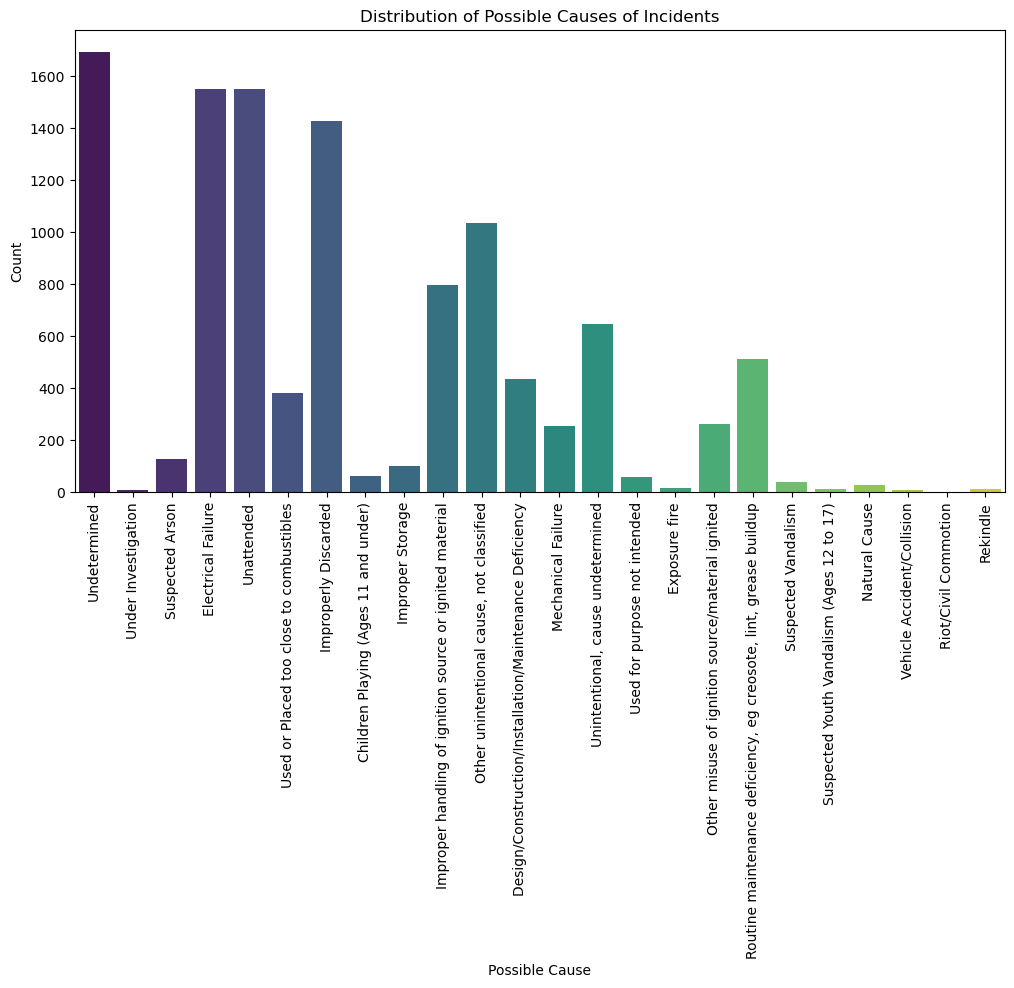

In [29]:
plt.figure(figsize=(12, 6))
sns.countplot(x='possible_cause', data=tfire, palette='viridis')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Distribution of Possible Causes of Incidents')
plt.xlabel('Possible Cause')
plt.ylabel('Count')

### Create categories for further analysis

In [32]:

# Initialize the new column with empty strings
tfire['cause_category'] = ''

# Assign categories to the 'cause_category' column

# Vandalism and Arson
tfire.loc[tfire['possible_cause'].isin([
    'Suspected Vandalism', 
    'Suspected Youth Vandalism (Ages 12 to 17)', 
    'Suspected Arson'
]), 'cause_category'] = 'Vandalism and Arson'

# Improper Use or Carelessness
tfire.loc[tfire['possible_cause'].isin([
    'Improperly Discarded', 
    'Improper handling of ignition source or ignited material', 
    'Used or Placed too close to combustibles', 
    'Improper Storage', 
    'Used for purpose not intended'
    
]), 'cause_category'] = 'Improper Use or Carelessness'

# Unattended and Children
tfire.loc[tfire['possible_cause'].isin([
    'Unattended', 
    'Children Playing (Ages 11 and under)'
]), 'cause_category'] = 'Unattended and Children'

# Electrical and Mechanical Issues
tfire.loc[tfire['possible_cause'].isin([
    'Electrical Failure', 
    'Mechanical Failure'
]), 'cause_category'] = 'Electrical and Mechanical Issues'

# Design and Maintenance Issues
tfire.loc[tfire['possible_cause'].isin([
    'Routine maintenance deficiency, eg creosote, lint, grease buildup', 
    'Design/Construction/Installation/Maintenance Deficiency'
]), 'cause_category'] = 'Design and Maintenance Issues'

# Natural Causes and Exposure
tfire.loc[tfire['possible_cause'].isin([
    'Natural Cause', 
    'Exposure fire'
]), 'cause_category'] = 'Natural Causes and Exposure'

# Undetermined causes
tfire.loc[tfire['possible_cause'].isin([
    'Undetermined', 
    'Unintentional, cause undetermined', 
    'Other unintentional cause, not classified'
]), 'cause_category'] = 'Undetermined cause'

# Investigations
tfire.loc[tfire['possible_cause'].isin([
    'Under Investigation', 
    'Rekindle'
]), 'cause_category'] = 'Investigations'

# Accidents and Collisions
tfire.loc[tfire['possible_cause'].isin([
    'Vehicle Accident/Collision', 
    'Riot/Civil Commotion'
]), 'cause_category'] = 'Accidents and Collisions'

In [34]:
tfire['cause_category'].value_counts()

cause_category
Undetermined cause                  3369
Improper Use or Carelessness        2759
Electrical and Mechanical Issues    1802
Unattended and Children             1609
Design and Maintenance Issues        947
                                     263
Vandalism and Arson                  175
Natural Causes and Exposure           42
Investigations                        19
Accidents and Collisions              10
Name: count, dtype: int64

In [38]:
# Check for unique possible_cause values that are not categorized
unclassified_causes = tfire[~tfire['possible_cause'].isin([
    'Suspected Vandalism', 
    'Suspected Youth Vandalism (Ages 12 to 17)', 
    'Suspected Arson',
    'Improperly Discarded', 
    'Improper handling of ignition source or ignited material', 
    'Used or Placed too close to combustibles', 
    'Improper Storage', 
    'Used for purpose not intended',
    'Unattended', 
    'Children Playing (Ages 11 and under)',
    'Electrical Failure', 
    'Mechanical Failure',
    'Routine maintenance deficiency, eg creosote, lint, grease buildup', 
    'Design/Construction/Installation/Maintenance Deficiency',
    'Natural Cause', 
    'Exposure fire',
    'Undetermined', 
    'Unintentional, cause undetermined', 
    'Other unintentional cause, not classified',
    'Under Investigation', 
    'Rekindle',
    'Vehicle Accident/Collision', 
    'Riot/Civil Commotion'
])]

print(unclassified_causes['possible_cause'].unique())  # Show unique unclassified causes


['Other misuse of ignition source/material ignited']


In [40]:
# Update 'Other misuse of ignition source/material ignited' to 'Improper Use or Carelessness'
tfire.loc[tfire['possible_cause'] == 'Other misuse of ignition source/material ignited', 'cause_category'] = 'Improper Use or Carelessness'

In [42]:
tfire['cause_category'].value_counts()

cause_category
Undetermined cause                  3369
Improper Use or Carelessness        3022
Electrical and Mechanical Issues    1802
Unattended and Children             1609
Design and Maintenance Issues        947
Vandalism and Arson                  175
Natural Causes and Exposure           42
Investigations                        19
Accidents and Collisions              10
Name: count, dtype: int64

#### Create a graph to see the most common cause of fire based only on incidents with a known cause

In [56]:
# Exclude categories 'Unknown', 'Under Investigation', and any other unwanted categories
known_causes = ['Improper Use or Carelessness', 'Electrical and Mechanical Issues',
                'Unattended and Children', 'Design and Maintenance Issues', 'Vandalism and Arson',
                'Natural Causes and Exposure', 'Accidents and Collisions']

# Filter the DataFrame to include only rows with known causes
filtered_tfire = tfire[tfire['cause_category'].isin(known_causes)]

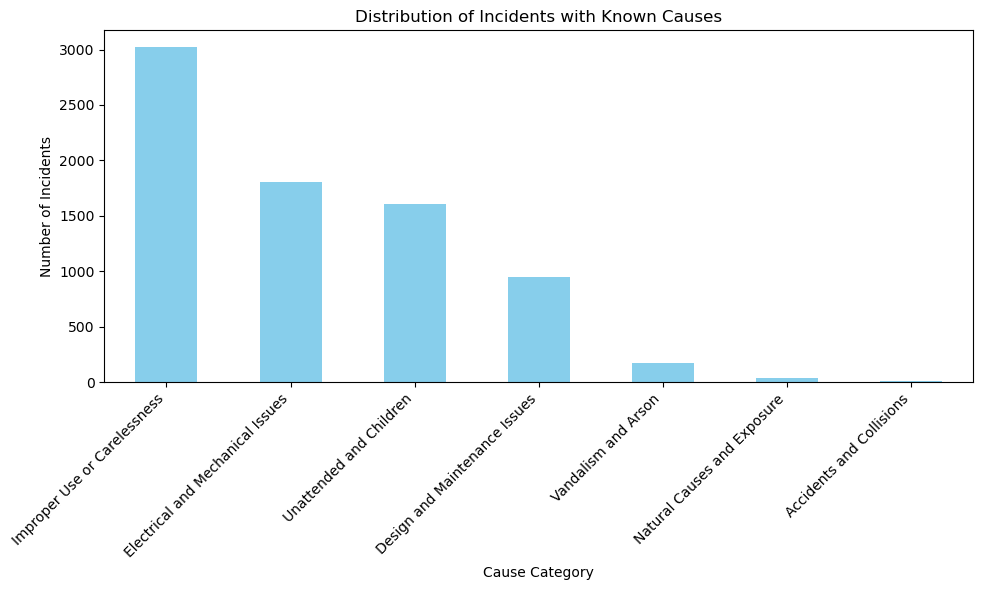

In [58]:
import matplotlib.pyplot as plt

# Count the number of incidents per cause category
cause_counts = filtered_tfire['cause_category'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
cause_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Incidents with Known Causes')
plt.xlabel('Cause Category')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout() 
plt.show()

### Once unknown causes are removed then by far the most common cause of fire is improper use or carelessness

#### This may be useful for further investigation when measured against other criteria such as ignition source or location fire started

## Export

In [66]:
tfire.to_csv(r"C:\Users\agwsi\CF\6. Advanced Analytics and Dashboard design\Project folder\3. Prepared Data\TFS_fire_wrangled.csv")